# PRIVATE INVESTMENT IN EDUCATION
# Model Becker-Tomes without credit constraints (1986)

Imports and set magics:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import sympy as sm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from types import SimpleNamespace
from ipywidgets import interact, FloatSlider
import math

# Ensure modules are reloaded on each run
%load_ext autoreload
%autoreload 2

# Assuming the class BeckerTomesModelDebugged is defined in the module named Noah
from modelproject import BeckerTomesModelDebugged

# Create an instance of the model
model = BeckerTomesModelDebugged()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

The model proposed by Becker and Tomes in 1967 focuses specifically on the investment decisions individuals make regarding their education without considering financial constraints. This model contributes to literature on intergenerational income persistence and inequality. 

Additionality, it is relevant for understanding how individuals make decisions about investing in education and human capital formation when they do not face limitations on accessing financial resources or credit.

In it important to consider that, we have to take the following assumptions to get into the model:
- Parents invest in children's human capital.
- Structure or credit markets matter.
- Intergenerational income persistence via heritability of endowments (Income effect transmitted bia human vapital investment), which means that if parents have a mean above or below incomes, their children will have incomes closer to the mean than parents. 
- The heritability leads to "regression to mean" of human capital and income, which means that when a variable is extreme at the first measurement, it will tend to be closer to average on its second measurement. 

The model presents a representative individual whose chooses how much time to invest in education in 2 periods in time ${t-1}$ (Child youth and parent adulthood) and time ${t}$ (Child adulthood, and grandchild). Human capital production depends on parentaland public expenditures and endowment. 

The equation we have to maximize is: 

$$
Max_{x_{t-1}}Y_{t}-(1+r_{t})D_{t-1}
$$

$$
s.t
$$

$$
Y_{t}=H_{t}+I_{t}
$$

$$
H_{t}=\psi({x_{t-1}},{s_{t-1}},{E_{t}})
$$

$$
E_{t}= \alpha_{t} + h{E_{t-1}} + v_{t}
$$

$$
D_{t-1}= C_{t-1}+ x_{t-1}-Y_{t-1}
$$

Where $Y_{t}$ is the maximization of the children's income, $H_{t}$ is the Human Capital, Luckiness is represented by $I_{t}$, $x_{t-1}$ is the parents investment in education, $s_{t-1}$ is the government investment in education, $E_{t}$ is the children's endowments, $h$ is the intergenerational feature, the rate from the financial market is represented by $r_{t}$, $C_{t-1}$ is the Consumption, and $(1+r_{t})D_{t-1}$ is when children pay for the debt with an interest rate.

Notice that:

$\psi'(.)>0$ in all inputs ($H_{t}$ is a growing functions) and $\psi'(.)<0$ shows a decreasing returns.

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

In [7]:
# Solve the model using continuous optimization
model.solve_continuous()
# Print the results from the continuous solution
print(f'Optimal parental investment: {model.sol.optimal_X}')
print(f'Human capital level: {model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0)}')
print(f'Optimal income: {model.calc_income(model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0), model.par.I1)}')

Optimal parental investment: 0.2003270380467629
Human capital level: 1.6456489822863487
Optimal income: 2.1456489822863487


In [8]:
# Solve the model using discrete optimization
model.solve_discrete()

# Access and print the optimal values from the discrete solution
print(f'Optimal X0: {model.sol.optimal_X0}')
print(f'Optimal E1: {model.endowment_production(model.par.E0)}')
print(f'Optimal H1: {model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0))}')
print(f'Optimal Y1: {model.calc_income(model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0)), model.par.I1)}')
print(f'Optimal D1: {model.calc_debt(model.sol.optimal_X0, model.par.Y0)}')

Discrete Solution: Optimal X0=0.20202020202020202
Optimal X0: 0.20202020202020202
Optimal E1: 1.42
Optimal H1: 1.95342161035749
Optimal Y1: 2.45342161035749
Optimal D1: 0.20202020202020243


/Users/petra/Desktop/KU/Introduction to Programming/Intro to Prog /projects-2024-petra-maritza-noah/modelproject/modelproject.py:33: RuntimeWarning: invalid value encountered in power
  H1 = X0**0.4 + S0**0.5 + 0.3*E1


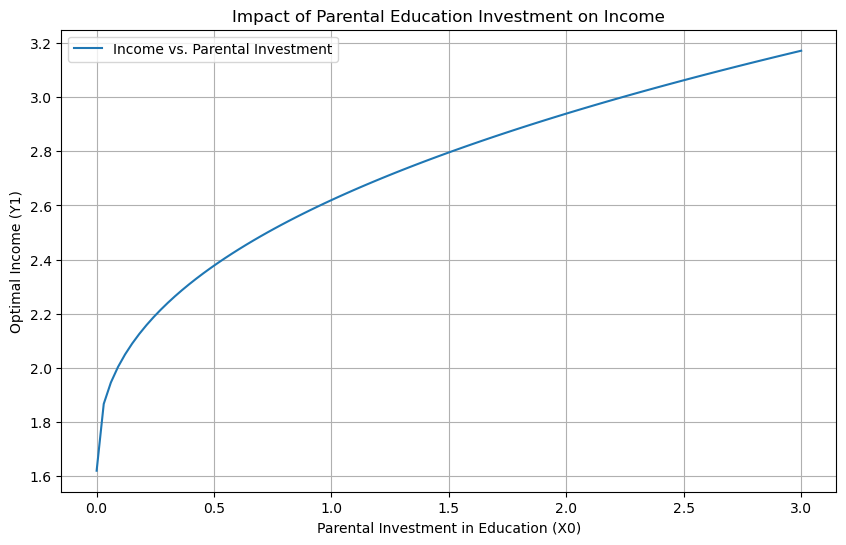

In [9]:
# Set a range of values for parental investment (X0)
X0_values = np.linspace(0, 3, 100)  # Adjust the range and count as needed
income_results = []

# Iterate over the range of X0 values, solve the model, and collect incomes
for X0 in X0_values:
    model.par.X0 = X0  # Update the parental investment parameter
    model.solve_continuous()  # Solve the model (assuming this updates the model.sol with new values)
    optimal_H = model.human_capital_production(X0, model.par.S0, model.par.E0)
    optimal_income = model.calc_income(optimal_H, model.par.I1)
    income_results.append(optimal_income)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X0_values, income_results, label='Income vs. Parental Investment')
plt.xlabel('Parental Investment in Education (X0)')
plt.ylabel('Optimal Income (Y1)')
plt.title('Impact of Parental Education Investment on Income')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
def interactive_plot(Y0):
    model.par.Y0 = Y0
    X0_values = np.linspace(0, 1, 100)  # Parental investment range
    Y1_values = []

    for X0 in X0_values:
        E1 = model.endowment_production(model.par.E0)
        H1 = model.human_capital_production(X0, model.par.S0, E1)
        Y1 = model.calc_income(H1, Y0)
        Y1_values.append(Y1)

    plt.figure(figsize=(10, 6))
    plt.plot(X0_values, Y1_values, label=f'Luckiness (I1) = {Y0:.2f}')
    plt.xlabel('Parental Investment in Education (X0)')
    plt.ylabel('Optimal Income (Y1)')
    plt.title('Impact of Parental Investment on Optimal Income with Varying Luckiness')
    plt.ylim(2.5, 6)  # Set a fixed y-axis range, adjust as needed
    plt.legend()
    plt.grid(True)
    plt.show()

Y0_slider = FloatSlider(min=0, max=1, step=0.05, value=0.5, description='Luckiness (I1)')
interact(interactive_plot, Y0=Y0_slider)

interactive(children=(FloatSlider(value=0.5, description='Luckiness (I1)', max=1.0, step=0.05), Output()), _do…

<function __main__.interactive_plot(Y0)>

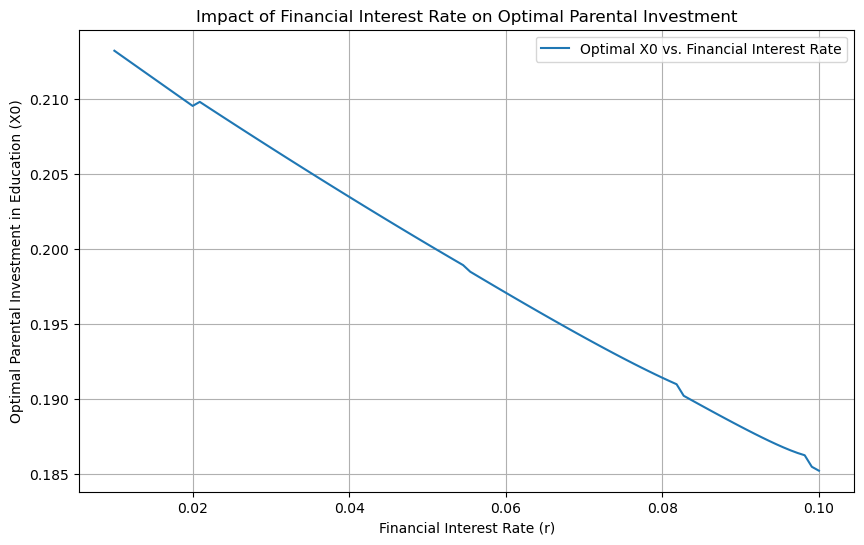

In [12]:
# Initialize the model
model = BeckerTomesModelDebugged()

# Set a range of values for the rate of return (r)
r_values = np.linspace(0.01, 0.1, 100)  # Range of rates of return
X0_values_at_optimal = []  # List to hold X0 values at optimal points

for r in r_values:
    model.par.rt = r  # Update the rate of return in the model
    model.solve_continuous()  # Solve the model
    X0_values_at_optimal.append(model.sol.optimal_X)  # Collect the optimal X0 for each rate

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r_values, X0_values_at_optimal, label='Optimal X0 vs. Financial Interest Rate')
plt.xlabel('Financial Interest Rate (r)')
plt.ylabel('Optimal Parental Investment in Education (X0)')
plt.title('Impact of Financial Interest Rate on Optimal Parental Investment')
plt.grid(True)
plt.legend()
plt.show()

This could suggest that when returns on investments outside of education (perhaps financial markets or alternative investment opportunities) become more attractive (i.e., higher r), parents opt to invest less in education, potentially due to a shift in priorities towards more immediately lucrative opportunities. 

In [13]:
# Initialize the model
model = BeckerTomesModelDebugged()

def interactive_plot(h):
    model.par.h = h  # Update the inheritability of endowments
    E0_values = np.linspace(0, 10, 100)  # Range of initial endowments
    Y1_values = []  # List to hold Y1 values

    for E0 in E0_values:
        model.par.E0 = E0  # Update the initial endowment in the model
        solution = model.solve_continuous()  # Solve the model
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(E0)
            H1 = model.human_capital_production(model.sol.optimal_X, model.par.S0, E1)
            Y1 = model.calc_income(H1, model.par.I1)
            Y1_values.append(Y1)  # Collect the optimal Y1 for each E0
        else:
            Y1_values.append(None)  # Append None or a default value if optimal_X is not available

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(E0_values, Y1_values, label=f'Inheritability (h) = {h:.2f}')
    plt.xlabel('Initial Endowment (E0)')
    plt.ylabel('Optimal Income (Y1)')
    plt.title('Impact of Initial Endowment on Optimal Income with Varying Inheritability')
    plt.ylim(1.5, 6)  # Set a fixed y-axis range, adjust as needed
    plt.legend()
    plt.grid(True)
    plt.show()

h_slider = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Inheritability (h)')
interact(interactive_plot, h=h_slider)

interactive(children=(FloatSlider(value=0.5, description='Inheritability (h)', max=1.0, step=0.01), Output()),…

<function __main__.interactive_plot(h)>

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 